In [1]:
print("hello")

hello


In [2]:
from typing import List,TypedDict

from langchain_community.document_loaders import PyPDFLoader,PyPDFDirectoryLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import  RecursiveCharacterTextSplitter
from langchain_openai import ChatOpenAI
from langchain_core.documents import Document
from langchain_core.prompts import ChatPromptTemplate
from langchain_huggingface import HuggingFaceEmbeddings

from langgraph.graph import START,StateGraph,END
from dotenv import load_dotenv
import os


d:\Vaibhav_PC\GenerativeAI\GI\Advance_RAG\Campus_RAG\CRAG\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
load_dotenv()

OPENROUTER_API_KEY=os.getenv("OPENROUTER_API_KEY")
os.environ["OPENROUTER_API_KEY"]=OPENROUTER_API_KEY

In [4]:
model= ChatOpenAI( base_url="https://openrouter.ai/api/v1",
    api_key=OPENROUTER_API_KEY,
    model= "nvidia/nemotron-3-nano-30b-a3b:free"
)
model.invoke("hello")

AIMessage(content='Hello! How can I assist you today? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 303, 'prompt_tokens': 17, 'total_tokens': 320, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': 0, 'reasoning_tokens': 321, 'rejected_prediction_tokens': None}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}, 'cost': 0, 'is_byok': False, 'cost_details': {'upstream_inference_cost': 0, 'upstream_inference_prompt_cost': 0, 'upstream_inference_completions_cost': 0}}, 'model_provider': 'openai', 'model_name': 'nvidia/nemotron-3-nano-30b-a3b:free', 'system_fingerprint': None, 'id': 'gen-1770753083-Mr4k8nk9AphPhPkKC6sf', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c491b-cb03-7812-895a-f184e534dbda-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 17, 'output_tokens': 303, 'total_tokens': 320, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_to

In [5]:
dir_path = "./documents"

loader=PyPDFDirectoryLoader(
    path= dir_path,
    glob= "**/*.pdf",
)

docs= loader.load()


In [6]:
docs[:3]

[Document(metadata={'producer': 'Acrobat Distiller 6.0 (Windows)', 'creator': 'Adobe Acrobat 6.0', 'creationdate': '2006-10-18T12:52:36+08:00', 'author': 'Christopher M. Bishop', 'moddate': '2008-02-08T16:41:33+01:00', 'title': 'Pattern Recognition and Machine Learning', 'source': 'documents\\book1.pdf', 'total_pages': 758, 'page': 0, 'page_label': 'i'}, page_content=''),
 Document(metadata={'producer': 'Acrobat Distiller 6.0 (Windows)', 'creator': 'Adobe Acrobat 6.0', 'creationdate': '2006-10-18T12:52:36+08:00', 'author': 'Christopher M. Bishop', 'moddate': '2008-02-08T16:41:33+01:00', 'title': 'Pattern Recognition and Machine Learning', 'source': 'documents\\book1.pdf', 'total_pages': 758, 'page': 1, 'page_label': 'ii'}, page_content='Information Science and Statistics\nSeries Editors:\nM. Jordan\nJ. Kleinberg\nB. Scho¨lkopf'),
 Document(metadata={'producer': 'Acrobat Distiller 6.0 (Windows)', 'creator': 'Adobe Acrobat 6.0', 'creationdate': '2006-10-18T12:52:36+08:00', 'author': 'Chr

In [7]:
len(docs)

2123

In [8]:
#chunks

splitter= RecursiveCharacterTextSplitter(chunk_size= 900,chunk_overlap =150,)
chunks = splitter.split_documents(docs)
chunks[:3]

[Document(metadata={'producer': 'Acrobat Distiller 6.0 (Windows)', 'creator': 'Adobe Acrobat 6.0', 'creationdate': '2006-10-18T12:52:36+08:00', 'author': 'Christopher M. Bishop', 'moddate': '2008-02-08T16:41:33+01:00', 'title': 'Pattern Recognition and Machine Learning', 'source': 'documents\\book1.pdf', 'total_pages': 758, 'page': 1, 'page_label': 'ii'}, page_content='Information Science and Statistics\nSeries Editors:\nM. Jordan\nJ. Kleinberg\nB. Scho¨lkopf'),
 Document(metadata={'producer': 'Acrobat Distiller 6.0 (Windows)', 'creator': 'Adobe Acrobat 6.0', 'creationdate': '2006-10-18T12:52:36+08:00', 'author': 'Christopher M. Bishop', 'moddate': '2008-02-08T16:41:33+01:00', 'title': 'Pattern Recognition and Machine Learning', 'source': 'documents\\book1.pdf', 'total_pages': 758, 'page': 2, 'page_label': 'iii'}, page_content='Information Science and Statistics \nAkaike and Kitagawa: The Practice of Time Series Analysis. \nBishop:  Pattern Recognition and Machine Learning. \nCowell, D

In [9]:
len(chunks)

6396

In [10]:
chunks=[doc for doc in chunks if doc.page_content and doc.page_content.strip()]
chunks[:3]


[Document(metadata={'producer': 'Acrobat Distiller 6.0 (Windows)', 'creator': 'Adobe Acrobat 6.0', 'creationdate': '2006-10-18T12:52:36+08:00', 'author': 'Christopher M. Bishop', 'moddate': '2008-02-08T16:41:33+01:00', 'title': 'Pattern Recognition and Machine Learning', 'source': 'documents\\book1.pdf', 'total_pages': 758, 'page': 1, 'page_label': 'ii'}, page_content='Information Science and Statistics\nSeries Editors:\nM. Jordan\nJ. Kleinberg\nB. Scho¨lkopf'),
 Document(metadata={'producer': 'Acrobat Distiller 6.0 (Windows)', 'creator': 'Adobe Acrobat 6.0', 'creationdate': '2006-10-18T12:52:36+08:00', 'author': 'Christopher M. Bishop', 'moddate': '2008-02-08T16:41:33+01:00', 'title': 'Pattern Recognition and Machine Learning', 'source': 'documents\\book1.pdf', 'total_pages': 758, 'page': 2, 'page_label': 'iii'}, page_content='Information Science and Statistics \nAkaike and Kitagawa: The Practice of Time Series Analysis. \nBishop:  Pattern Recognition and Machine Learning. \nCowell, D

In [11]:
#clean text
clean_chunk = [d.page_content.encode("utf-8","ignore").decode("utf-","ignore") for d in chunks]
clean_chunk[:3]

['Information Science and Statistics\nSeries Editors:\nM. Jordan\nJ. Kleinberg\nB. Scho¨lkopf',
 'Information Science and Statistics \nAkaike and Kitagawa: The Practice of Time Series Analysis. \nBishop:  Pattern Recognition and Machine Learning. \nCowell, Dawid, Lauritzen, and Spiegelhalter: Probabilistic Networks and\nExpert Systems. \nDoucet, de Freitas, and Gordon: Sequential Monte Carlo Methods in Practice. \nFine: Feedforward Neural Network Methodology. \nHawkins and Olwell: Cumulative Sum Charts and Charting for Quality Improvement. \nJensen: Bayesian Networks and Decision Graphs. \nMarchette: Computer Intrusion Detection and Network Monitoring:\nA Statistical Viewpoint. \nRubinstein and Kroese: The Cross-Entropy Method:  A Unified Approach to \nCombinatorial Optimization, Monte Carlo Simulation, and Machine Learning. \nStudený: Probabilistic Conditional Independence Structures.\nVapnik: The Nature of Statistical Learning Theory, Second Edition.',
 'Studený: Probabilistic Condit

In [12]:
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    model_kwargs={'device': 'cpu'},
    encode_kwargs={'normalize_embeddings': False})
    
# vector_store =FAISS.from_documents(documents=chunks[:6000],
#                     embedding=embeddings)

In [13]:
# Nuclear option - rebuild chunks from scratch
clean_texts = []
clean_metadatas = []

for doc in chunks:
    try:
        # Force convert to string and clean
        text = str(doc.page_content).strip()
        
        # Remove any non-printable characters
        text = ''.join(char for char in text if char.isprintable() or char in ['\n', '\t'])
        
        if len(text) > 10:  # At least 10 characters
            clean_texts.append(text)
            clean_metadatas.append(doc.metadata if hasattr(doc, 'metadata') else {})
    except Exception as e:
        print(f"Error processing chunk: {e}")
        continue

print(f"Clean texts: {len(clean_texts)}")

# Now create vector store
vector_store = FAISS.from_texts(
    texts=clean_texts[:6396],
    embedding=embeddings,
    metadatas=clean_metadatas[:6396]
)

Clean texts: 6396


In [14]:
retriever=vector_store.as_retriever(search_type= 'similarity',
                                    search_kwargs={'k':4})
retriever.invoke("what is deep learning")

[Document(id='5a9d8f93-c0ea-42ed-ae98-4576ef54b086', metadata={'producer': 'Antenna House PDF Output Library 6.2.609 (Linux64)', 'creator': 'AH CSS Formatter V6.2 MR4 for Linux64 : 6.2.6.18551 (2014/09/24 15:00JST)', 'creationdate': '2017-03-10T21:55:34+00:00', 'author': 'Aurélien Géron', 'moddate': '2017-07-29T21:43:02+08:00', 'title': 'Hands-On Machine Learning with Scikit-Learn and TensorFlow', 'trapped': '/False', 'source': 'documents\\book3.pdf', 'total_pages': 564, 'page': 17, 'page_label': 'xvi'}, page_content='Part II, Neural Networks and Deep Learning, covers the following topics:\n• Wha t are neural nets? Wha\nt are they good for?\n• Building and training neural nets using TensorFlow.\n• The most important neural net architectures: feedforward neural nets, convolu‐\ntional nets, recurrent nets, long short-term memory (LSTM) nets, and a\nutoen‐\ncoders.\n• Techniques for training deep neural nets.\n• Scaling neural networks for huge datasets.\n• Reinforcement learning.\nThe fi

In [15]:
class State(TypedDict):
    question :str
    docs : List[Document]
    answer :str

In [16]:
def retrieve(state):
    q = state['question']
    return {'docs':retriever.invoke(q)}

In [17]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "Answer only from the context. If not in context, say you don't know."),
        ("human", "Question: {question}\n\nContext:\n{context}"),
    ]
)
def generate(state):
    context = "\n\n".join(d.page_content for d in state["docs"])
    out = (prompt | model).invoke({"question": state["question"], "context": context})
    return {"answer": out.content}

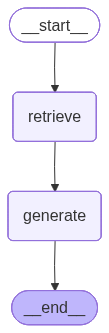

In [18]:
g= StateGraph(State)
g.add_node('retrieve',retrieve)
g.add_node('generate',generate)
g.add_edge('retrieve','generate')
g.set_entry_point('retrieve')
g.add_edge('generate',END)

app=g.compile()
app

In [21]:
res = app.invoke({"question": "What is deep learning.", "docs": [], "answer": ""})
print(res["answer"])

Deep learning is the area of machine learning that focuses on training **deep neural networks**—networks with multiple hidden layers—that can automatically learn hierarchical, structured representations of data. As described in the context, it involves “training deep neural nets capable of recognizing handwritten digits” and uses architectures such as feed‑forward, convolutional, and recurrent nets to model complex functions with far fewer parameters than shallow networks. This enables tasks like image classification, speech recognition, and game playing on a large scale.


Here might be the chance that he give wrong answer

In [20]:
# 5) Run
res = app.invoke({"question": "What is a transformer in deep learning.", "docs": [], "answer": ""})
print(res["answer"])

I don't know.
